# Home_Credit_Default_Risk_EDA Assignment

## Table of contents:-

0. <a href="#Task-0">Task 0:- Library and Data import</a>
1. <a href="#Task-1">Task 1:- Explore the target variable</a>
2. <a href="#Task-2">Task 2:- Explore the relationship between target and predictors</a>
3. <a href="#Task-3">Task 3:- Data exploration Details</a>
4. <a href="#Task-4">Task 4:- Explore the scope of missing data in application</a>
5. <a href="#Task-5">Task 5:- Handleing outliers and columns with near-zero or zero variance </a>
6. <a href="#Task-6">Task 6:- Transformation of Input Data</a>
7. <a href="#Task-7">Task 7:- Join application_{train|test}.csv with transactional data</a>
8. <a href="#Task-8">Task 8:- Explore the joined transactional data</a>

## Task 0

### Libraries and Data Import

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier


In [53]:
import warnings
warnings.filterwarnings("ignore")

In [54]:
home_credit_train = pd.read_csv("C:/Users/Asus/Downloads/home-credit-default-risk/application_train.csv")

In [55]:
home_credit_test = pd.read_csv("C:/Users/Asus/Downloads/home-credit-default-risk/application_test.csv")

In [56]:
home_credit_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [57]:
home_credit_test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


## Task 1

### Explore the target variable

In [58]:
home_credit_train['TARGET'].value_counts()*100/len(home_credit_train)

TARGET
0    91.927118
1     8.072882
Name: count, dtype: float64

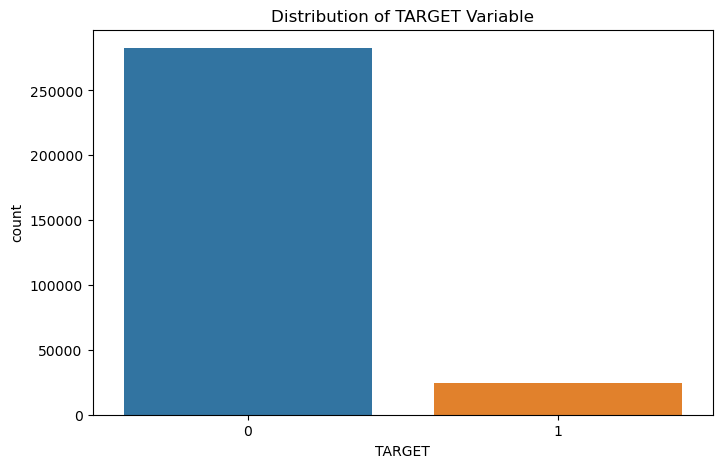

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(x='TARGET', data=home_credit_train)
plt.title('Distribution of TARGET Variable')
plt.show()

In [60]:
#The data is unbalanced with respect to the target as the distribution of the target variable is about 92% for 0(Non-defaulters) and only 8% for 1(defaulters)

In [61]:
accuracy = home_credit_train["TARGET"].value_counts().max()*100 / len(home_credit_train)
print("Majority class classifier accuracy:", accuracy)


Majority class classifier accuracy: 91.92711805431351


In [62]:
# The accuracy be for a simple model consisting in a majority class classifier would be 91.92%

## Task 2

### Explore the relationship between target and predictors, looking for potentially strong predictors that could be included later in a model.

In [63]:
numeric_predictors = home_credit_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Visualize relationship for numerical predictors
# for predictor in numeric_predictors:
#     sns.boxplot(x='TARGET', y=predictor, data=home_credit_train)
#     plt.title(f'Relationship between {predictor} and TARGET')
#     plt.figure(figsize=(10, 10))
#     plt.show()

In [64]:
correlation_matrix = home_credit_train.select_dtypes(include=['int64', 'float64']).corr()
strong_correlations = correlation_matrix['TARGET'].sort_values(ascending=False)
print("positive Correlations with TARGET:")
print(strong_correlations.head(6))
print("negative Correlations with TARGET:")
print(strong_correlations.tail(6))
#print(strong_correlations[strong_correlations<0].tail(10))

positive Correlations with TARGET:
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
Name: TARGET, dtype: float64
negative Correlations with TARGET:
FLOORSMAX_MEDI   -0.043768
FLOORSMAX_AVG    -0.044003
DAYS_EMPLOYED    -0.044932
EXT_SOURCE_1     -0.155317
EXT_SOURCE_2     -0.160472
EXT_SOURCE_3     -0.178919
Name: TARGET, dtype: float64


In [65]:
# These are the top 6 strong numeric predictors that could be included later in a model.

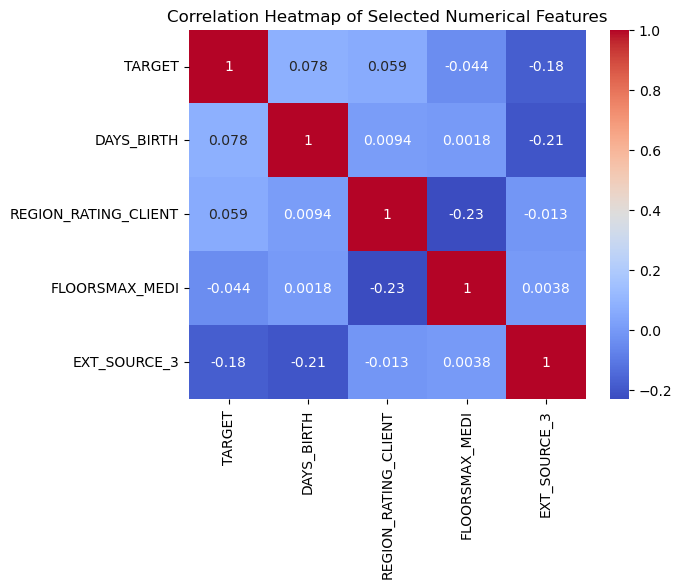

In [66]:


# Selecting a few numerical variables for the correlation matrix
numerical_features = ['TARGET','DAYS_BIRTH', 'REGION_RATING_CLIENT', 'FLOORSMAX_MEDI','EXT_SOURCE_3']
correlation_matrix1 = home_credit_train[numerical_features].corr()

# Plotting the heatmap
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Numerical Features')
plt.show()

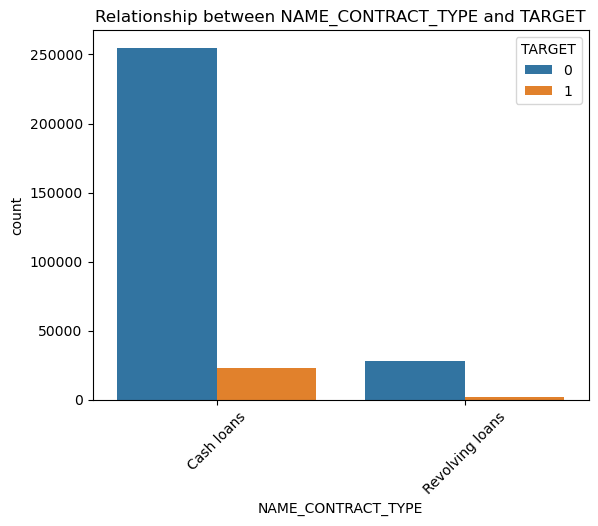

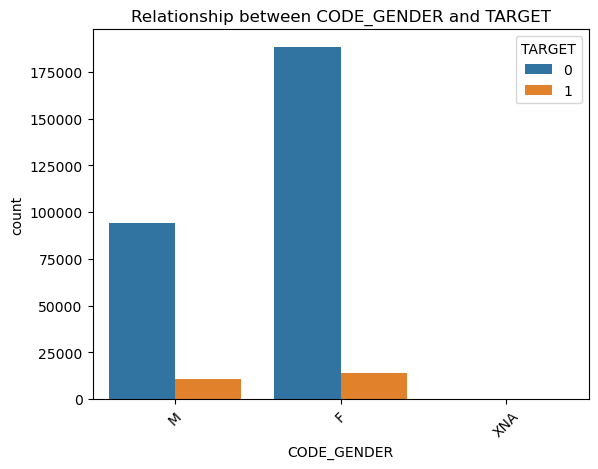

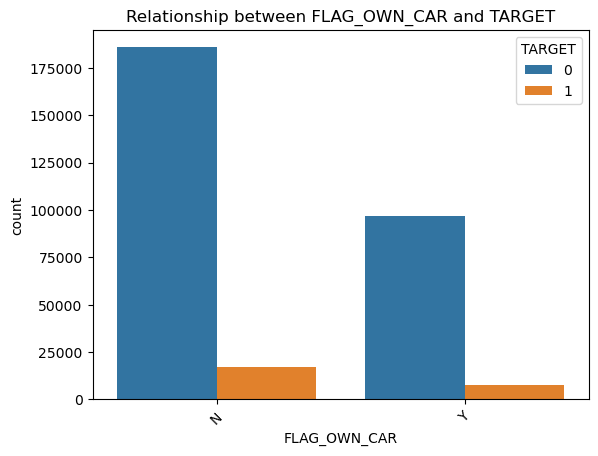

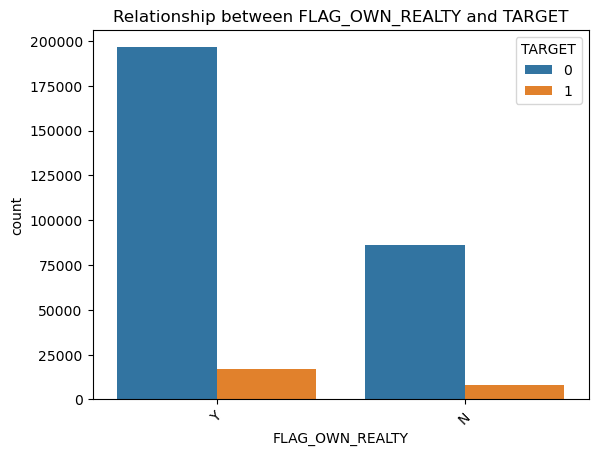

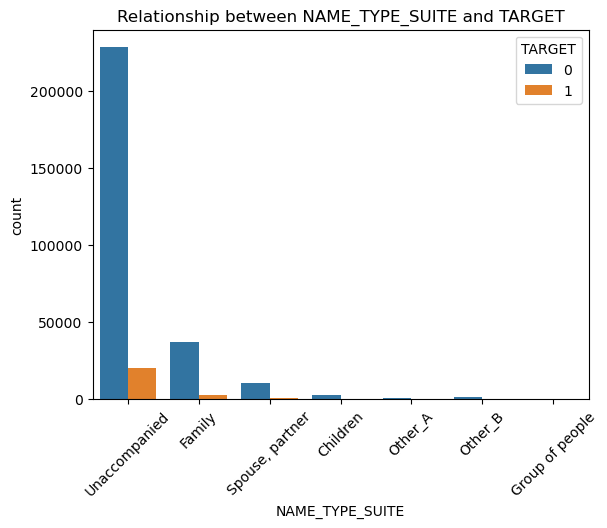

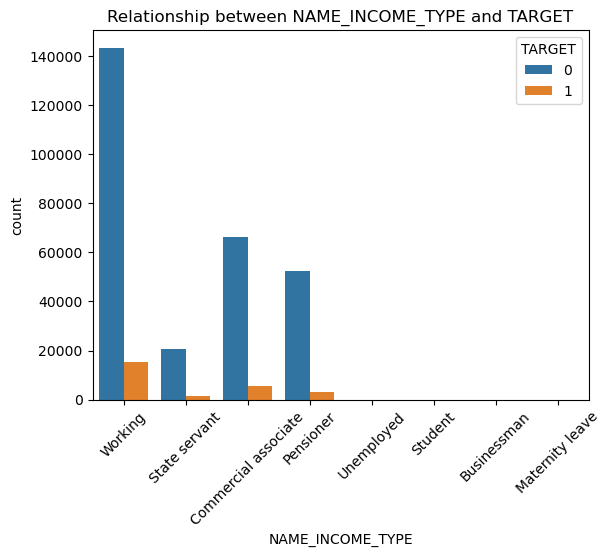

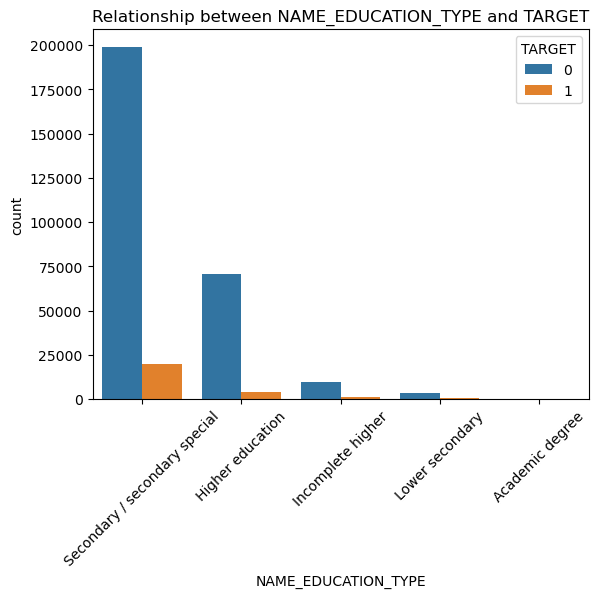

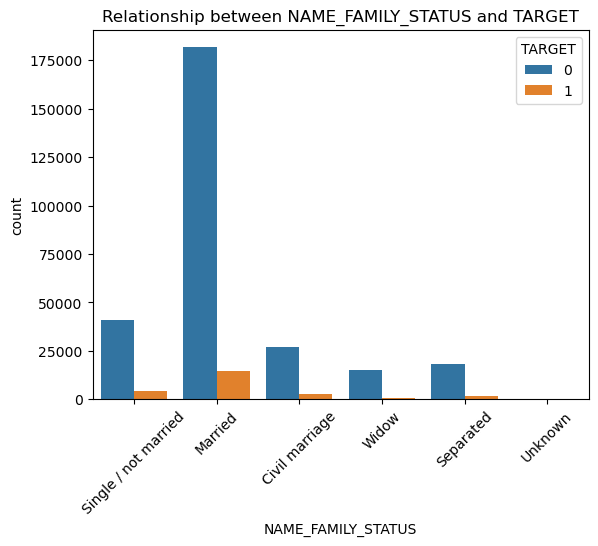

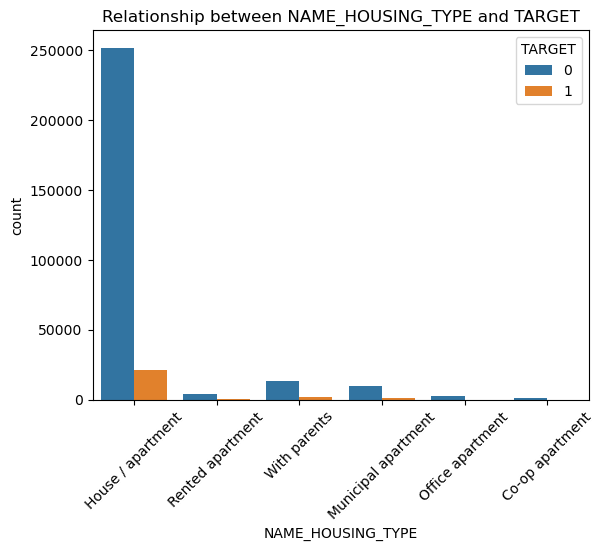

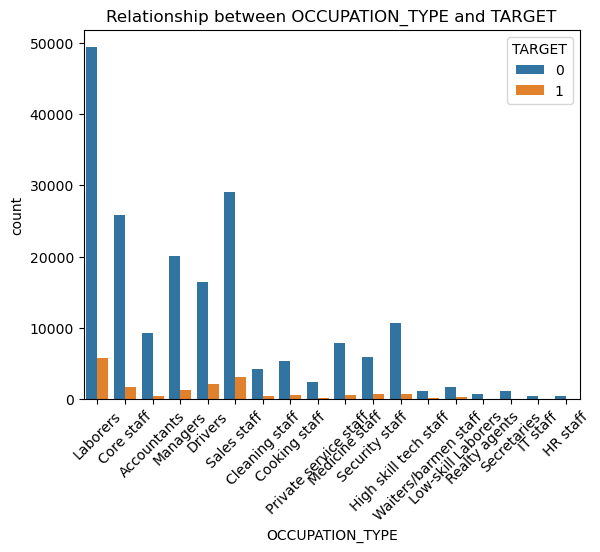

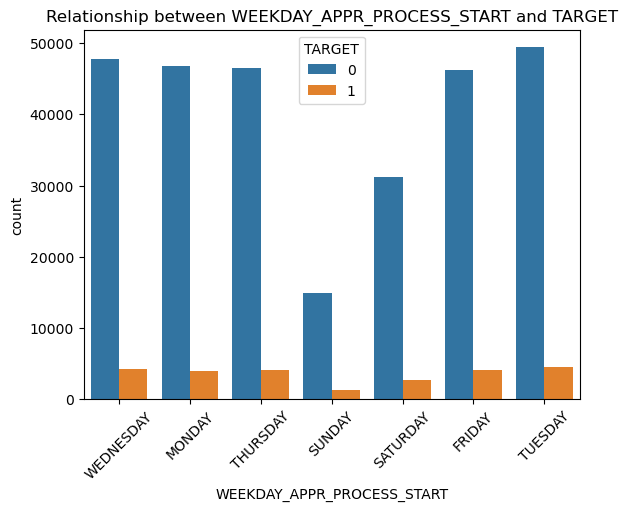

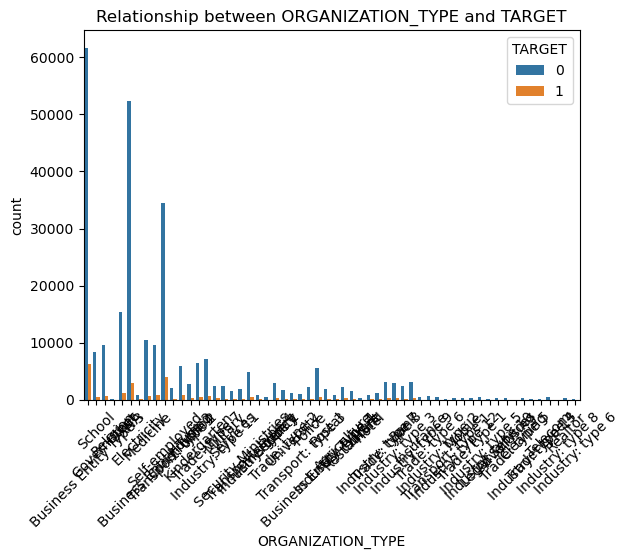

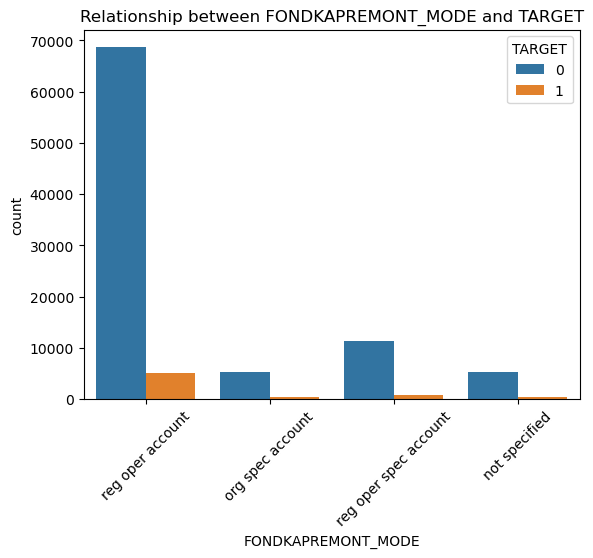

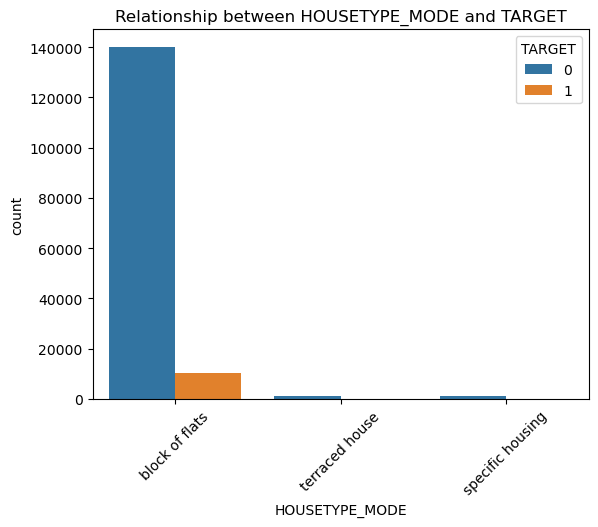

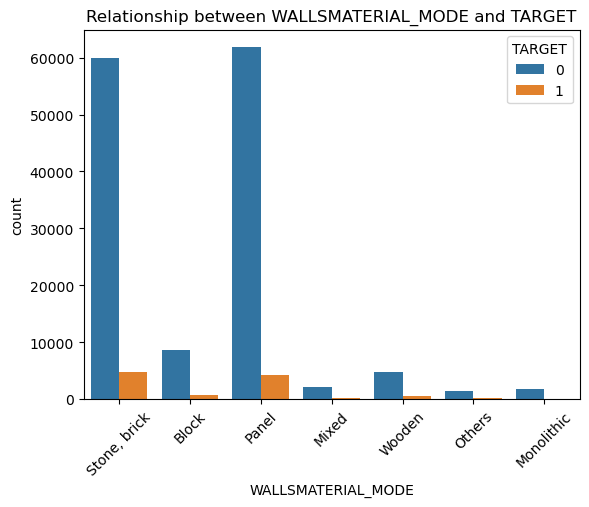

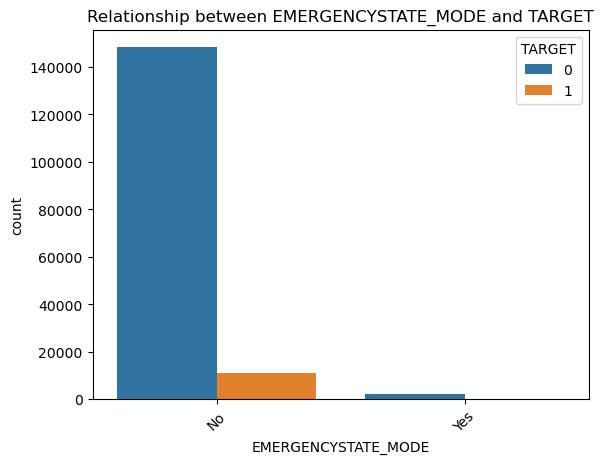

In [67]:
categorical_predictors = home_credit_train.select_dtypes(include=['object']).columns.tolist()

# Visualize relationship for categorical predictors
for predictor in categorical_predictors:
    sns.countplot(x=predictor, hue='TARGET', data=home_credit_train)
    plt.title(f'Relationship between {predictor} and TARGET')
    plt.xticks(rotation=45)
    plt.show()

## Task 3

### The skimr package in R has some great data exploration tools, and the janitor package has utilities that will simplify data cleaning.

In [68]:
# We can accomplish similar tasks using libraries such as pandas, seaborn,matplotlib and scikit-learn. 

## Task 4

###  Explore the scope of missing data in application_{train|test}.csv and come up with possible solutions. Remove rows?  Remove columns?  Impute?

In [69]:
# Check for missing values
train_missing = home_credit_train.isnull().sum()
test_missing = home_credit_test.isnull().sum()

In [70]:
pd.options.display.max_rows = 300
train_missing

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [71]:
len(home_credit_train)

307511

In [72]:
train_missing_percent = (train_missing / len(home_credit_train)) * 100


In [73]:
missing_data = pd.DataFrame({
    'Train Missing': train_missing,
    'Train_Missing_percentage': train_missing_percent})
print(missing_data)

                              Train Missing  Train_Missing_percentage
SK_ID_CURR                                0                  0.000000
TARGET                                    0                  0.000000
NAME_CONTRACT_TYPE                        0                  0.000000
CODE_GENDER                               0                  0.000000
FLAG_OWN_CAR                              0                  0.000000
FLAG_OWN_REALTY                           0                  0.000000
CNT_CHILDREN                              0                  0.000000
AMT_INCOME_TOTAL                          0                  0.000000
AMT_CREDIT                                0                  0.000000
AMT_ANNUITY                              12                  0.003902
AMT_GOODS_PRICE                         278                  0.090403
NAME_TYPE_SUITE                        1292                  0.420148
NAME_INCOME_TYPE                          0                  0.000000
NAME_EDUCATION_TYPE 

In [74]:
a=missing_data[missing_data['Train_Missing_percentage']>50].index.tolist()

In [75]:
home_credit_train.drop(a,axis=1,inplace=True)

In [76]:
home_credit_train.shape

(307511, 81)

In [77]:
# There are many columns which consist of null data.
# If the columns have missing values more than 50% then they are droped and remaining columns with missing data less than 50% can be imputed with filling the mean values or the most frequently used values in the respective columns.

In [78]:
train_missing1 = home_credit_train.isnull().sum()
train_missing1

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

In [79]:
n_columns=home_credit_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
for i in n_columns:
    if home_credit_train[i].isnull().sum()>0:
        home_credit_train[i].fillna(home_credit_train[i].mean(),inplace=True)
    else:
        home_credit_train[i].fillna(value=home_credit_train[i].mode()[0],inplace=True)
        

In [80]:
home_credit_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307511 non-null  float64
 10  AMT_GOODS_PRICE               307511 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

## Task 5

### Do the values make sense? Are there mistaken values that should be cleaned or imputed? (Note that outliers are not necessarily mistakes. Check APM for advice on how to handle outliers for a predictive project.) Are there columns with near-zero or zero variance?

In [81]:
numeric_data = home_credit_train.select_dtypes(include=['int', 'float64'])

# Calculate variance for each numeric column
variance = numeric_data.var()

# Set a threshold for near-zero variance (you can adjust this threshold as needed)
threshold = 0.01 

# Filter columns with near-zero or zero variance
near_zero_variance_cols = variance[variance <= threshold]

print(near_zero_variance_cols)

REGION_POPULATION_RELATIVE      0.000191
FLAG_MOBIL                      0.000003
FLAG_CONT_MOBILE                0.001863
YEARS_BEGINEXPLUATATION_AVG     0.001796
YEARS_BEGINEXPLUATATION_MODE    0.002136
YEARS_BEGINEXPLUATATION_MEDI    0.001838
TOTALAREA_MODE                  0.005974
FLAG_DOCUMENT_2                 0.000042
FLAG_DOCUMENT_4                 0.000081
FLAG_DOCUMENT_7                 0.000192
FLAG_DOCUMENT_9                 0.003881
FLAG_DOCUMENT_10                0.000023
FLAG_DOCUMENT_11                0.003897
FLAG_DOCUMENT_12                0.000007
FLAG_DOCUMENT_13                0.003513
FLAG_DOCUMENT_14                0.002928
FLAG_DOCUMENT_15                0.001208
FLAG_DOCUMENT_16                0.009830
FLAG_DOCUMENT_17                0.000267
FLAG_DOCUMENT_18                0.008064
FLAG_DOCUMENT_19                0.000595
FLAG_DOCUMENT_20                0.000507
FLAG_DOCUMENT_21                0.000335
AMT_REQ_CREDIT_BUREAU_HOUR      0.006081
dtype: float64


In [82]:
# These are the columns with near-zero variance

In [83]:
skewness = numeric_data.skew()
#numeric_data.hist(figsize=(10, 5))

print("Skewness:")
print(skewness)

#Data is mostly right skewed

Skewness:
SK_ID_CURR                       -0.001200
TARGET                            3.078159
CNT_CHILDREN                      1.974604
AMT_INCOME_TOTAL                391.559654
AMT_CREDIT                        1.234778
AMT_ANNUITY                       1.579808
AMT_GOODS_PRICE                   1.349611
REGION_POPULATION_RELATIVE        1.488009
DAYS_BIRTH                       -0.115673
DAYS_EMPLOYED                     1.664346
DAYS_REGISTRATION                -0.590872
DAYS_ID_PUBLISH                   0.349327
FLAG_MOBIL                     -554.536744
FLAG_EMP_PHONE                   -1.664886
FLAG_WORK_PHONE                   1.504950
FLAG_CONT_MOBILE                -23.081172
FLAG_PHONE                        0.974083
FLAG_EMAIL                        3.832853
CNT_FAM_MEMBERS                   0.987546
REGION_RATING_CLIENT              0.087468
REGION_RATING_CLIENT_W_CITY       0.059730
HOUR_APPR_PROCESS_START          -0.028024
REG_REGION_NOT_LIVE_REGION        7.940276
R

In [84]:
from scipy.stats import zscore #to compute zscore

#numeric_data = np.sqrt(numeric_data)
numerical_columns = numeric_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
home_credit_train[numerical_columns].apply(zscore)
# home_credit_train=home_credit_train[numerical_columns].apply(zscore)
# for i in numerical_columns:
#     if i in home_credit_train[i]:
#         home_

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,-1.733423,3.374485,-0.577538,0.142129,-0.478095,-0.166149,-0.507465,-0.149452,1.506880,-0.456215,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-5.176655e-01
1,-1.733413,-0.296342,-0.577538,0.426792,1.725450,0.592677,1.600698,-1.252750,-0.166821,-0.460115,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
2,-1.733403,-0.296342,-0.577538,-0.427196,-1.152888,-1.404676,-1.092389,-0.783451,-0.689509,-0.453299,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
3,-1.733384,-0.296342,-0.577538,-0.142533,-0.711430,0.177869,-0.653696,-0.928991,-0.680114,-0.473217,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
4,-1.733374,-0.296342,-0.577538,-0.199466,-0.213734,-0.361755,-0.068772,0.563570,-0.892535,-0.473210,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,1.732372,-0.296342,-0.577538,-0.047646,-0.855489,0.031009,-0.848671,0.845396,1.537586,-0.453377,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
307507,1.732381,-0.296342,-0.577538,-0.408219,-0.818594,-1.042339,-0.848671,0.310593,-1.085707,2.133617,...,-0.090534,-0.024402,-0.022529,-0.018305,3.336720e-17,0.000000,-3.645032e-17,0.000000,-7.516682e-17,-3.831603e-16
307508,1.732391,-0.296342,-0.577538,-0.066623,0.195379,0.198050,0.126202,-1.147120,0.245417,-0.507774,...,-0.090534,-0.024402,-0.022529,-0.018305,1.274116e+01,-0.067957,-1.805048e-01,0.859944,-3.594746e-01,-5.176655e-01
307509,1.732401,3.374485,-0.577538,0.009287,-0.568757,-0.476324,-0.592767,-1.124635,0.934008,-0.485583,...,-0.090534,-0.024402,-0.022529,-0.018305,-8.210023e-02,-0.067957,-1.805048e-01,-0.313873,-3.594746e-01,-1.092866e+00


In [85]:
# There Zscore is applied for the standardization

## Task 6

### Will the input data need to be transformed in order to be used in a model? 

In [86]:
categorical_variables = home_credit_train.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_variables)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']


In [87]:
home_credit_train[categorical_variables].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN


In [88]:
home_credit_train['NAME_INCOME_TYPE'].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [89]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the data to label encode
for col in categorical_variables:
    home_credit_train[col] = label_encoder.fit_transform(home_credit_train[col])

In [90]:
home_credit_train[categorical_variables].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,0,1,0,1,6,7,4,3,1,8,6,5,0
1,0,0,0,0,1,4,1,1,1,3,1,39,0
2,1,1,1,1,6,7,4,3,1,8,1,11,2
3,0,0,0,1,6,7,4,0,1,8,6,5,2
4,0,1,0,1,6,7,4,3,1,3,4,37,2


In [91]:
# Lable encoding is used to trasform the categorical variables into numerical format, making them suitable for machine learning algorithms.

## Task 7

### Join application_{train|test}.csv with transactional data in, for example, bureau.csv or previous_application.csv. 

In [92]:
df_bureau = pd.read_csv('C:/Users/Asus/Downloads/home-credit-default-risk/bureau.csv')
# Identifying the common columns
common_columns = list(set(df_bureau.columns) & set(home_credit_train.columns))
print("Common Columns:")
for column in common_columns:
    print(column)

# Joining the application_train dataset with bureau dataset
home_credit_train_merged = pd.merge(home_credit_train, df_bureau, on="SK_ID_CURR")
home_credit_train_merged.head()

Common Columns:
SK_ID_CURR
AMT_ANNUITY


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY_x,...,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY_y
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-1038.0,NaN,0,40761.0,NaN,NaN,0.0,Credit card,-1038,0.0
1,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-48.0,NaN,0,0.0,0.0,NaN,0.0,Credit card,-47,NaN
2,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-1185.0,0.000,0,135000.0,0.0,0.0,0.0,Consumer credit,-1185,0.0
3,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-911.0,3321.000,0,19071.0,NaN,NaN,0.0,Consumer credit,-906,0.0
4,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,-36.0,5043.645,0,120735.0,0.0,0.0,0.0,Consumer credit,-34,0.0


## Task 8

### Explore the joined transactional data.  Do some of the added columns show promise in predicting default?

In [93]:
home_credit_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465325 entries, 0 to 1465324
Data columns (total 97 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1465325 non-null  int64  
 1   TARGET                        1465325 non-null  int64  
 2   NAME_CONTRACT_TYPE            1465325 non-null  int32  
 3   CODE_GENDER                   1465325 non-null  int32  
 4   FLAG_OWN_CAR                  1465325 non-null  int32  
 5   FLAG_OWN_REALTY               1465325 non-null  int32  
 6   CNT_CHILDREN                  1465325 non-null  int64  
 7   AMT_INCOME_TOTAL              1465325 non-null  float64
 8   AMT_CREDIT                    1465325 non-null  float64
 9   AMT_ANNUITY_x                 1465325 non-null  float64
 10  AMT_GOODS_PRICE               1465325 non-null  float64
 11  NAME_TYPE_SUITE               1465325 non-null  int32  
 12  NAME_INCOME_TYPE            

In [94]:
home_credit_train_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLO

In [95]:
new_col=['TARGET','SK_ID_BUREAU','DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE','DAYS_CREDIT_UPDATE', 'AMT_ANNUITY_y']


In [96]:

a=home_credit_train_merged[new_col].corr()
a['TARGET'].sort_values(ascending=False)

TARGET                    1.000000
DAYS_CREDIT               0.061556
DAYS_CREDIT_UPDATE        0.041076
DAYS_ENDDATE_FACT         0.039057
DAYS_CREDIT_ENDDATE       0.026497
AMT_CREDIT_SUM_OVERDUE    0.006253
CREDIT_DAY_OVERDUE        0.002652
AMT_CREDIT_SUM_DEBT       0.002539
AMT_CREDIT_MAX_OVERDUE    0.001587
CNT_CREDIT_PROLONG        0.001523
AMT_ANNUITY_y             0.000117
AMT_CREDIT_SUM_LIMIT     -0.005990
SK_ID_BUREAU             -0.009018
AMT_CREDIT_SUM           -0.010606
Name: TARGET, dtype: float64

In [97]:
# columns like DAYS_CREDIT, DAYS_CREDIT_UPDATE ,DAYS_ENDDATE_FACT, DAYS_CREDIT_ENDDATE,AMT_CREDIT_SUM can impact on the predictions